# Exploratory Data Analysis 

In [23]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
%matplotlib inline 
pd.set_option('display.max_rows', None, 'display.max_columns', None)

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
data = pd.read_csv('salary_data_cleaned.csv')

In [3]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data scientist'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'


def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principle' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'


In [4]:
data['job_simplfier'] = data['Job Title'].apply(title_simplifier)
data['seniority'] = data['Job Title'].apply(seniority)

data.job_simplfier.value_counts(),data.seniority.value_counts()

(data scientist    398
 na                184
 analyst           102
 manager            22
 mle                22
 director           14
 Name: job_simplfier, dtype: int64,
 na        545
 senior    195
 jr          2
 Name: seniority, dtype: int64)

In [5]:
data['job_state'] = data.job_state.apply(lambda x: x.strip() 
                                         if x.strip().lower() != 'los angeles' else 'CA')

data.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [6]:
# Job description length
data['desc_len'] = data['Job Description'].apply(lambda x: len(x))

In [7]:
# Competitors count
data['num_comp'] = data['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [8]:
data.num_comp

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [9]:
data['min_salary'] = data.apply(
    lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)

In [10]:
data['max_salary'] = data.apply(
    lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)

In [11]:
data['company_txt'] = data.company_txt.apply(lambda x: x.replace('\n',''))

In [12]:
data.describe()

,Rating,Founded,hourly,emp_provided,min_salary,max_salary,average_salary,same_state,age,python,r_lang,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,47.524259,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.839080,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


<AxesSubplot:>

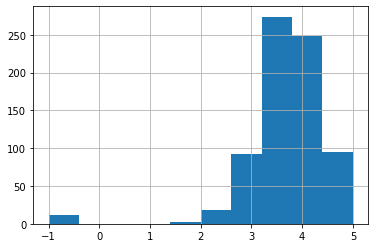

In [13]:
data.Rating.hist()

In [14]:
# Correlation between age, average_salary, Rating and desc_length
data[['age','average_salary','Rating','desc_len']].corr()

,age,average_salary,Rating,desc_len
age,1.000000,0.019574,0.023162,0.164188
average_salary,0.019574,1.000000,0.013492,0.078808
Rating,0.023162,0.013492,1.000000,-0.012281
desc_len,0.164188,0.078808,-0.012281,1.000000


<AxesSubplot:>

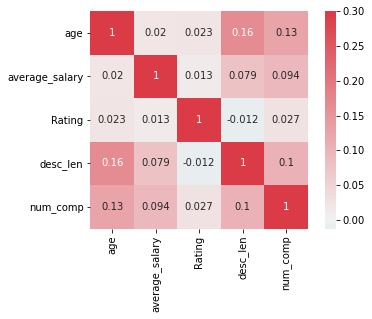

In [15]:
# _, ax = plt.subplots(figsize = (25, 20))
colormap= sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(data[['age', 'average_salary', 'Rating',
                       'desc_len','num_comp']].corr(),vmax=.3,center=0,cmap=colormap,square=True,annot=True)

In [16]:
data_cat = data[['Location', 'Headquarters', 'Size', 'Founded',
                 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'same_state', 'python', 'r_lang',
                 'spark', 'aws', 'excel', 'seniority']]

Graph for Location: total = 200


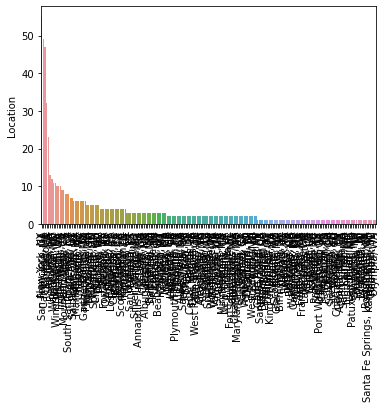

Graph for Headquarters: total = 198


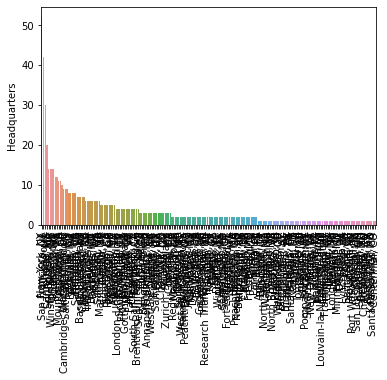

Graph for Size: total = 9


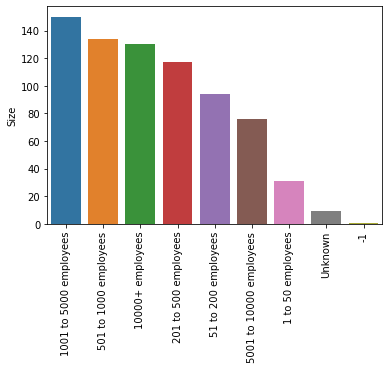

Graph for Founded: total = 102


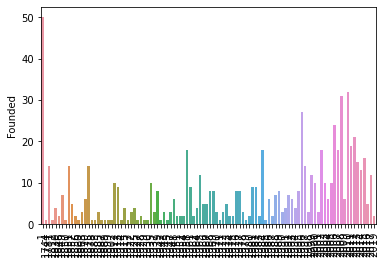

Graph for Type of ownership: total = 11


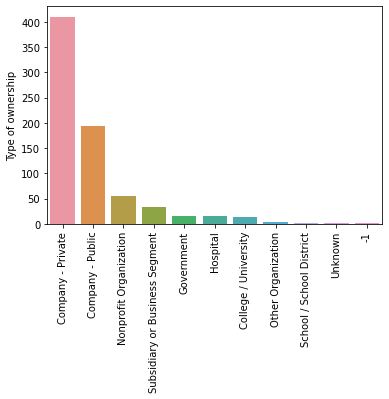

Graph for Industry: total = 60


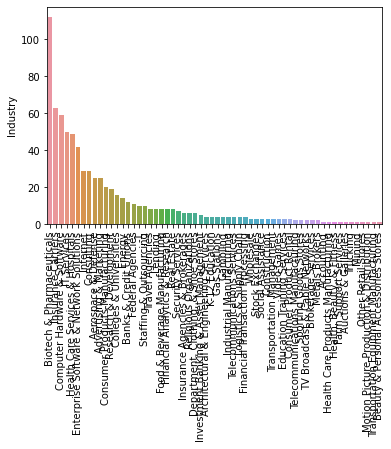

Graph for Sector: total = 25


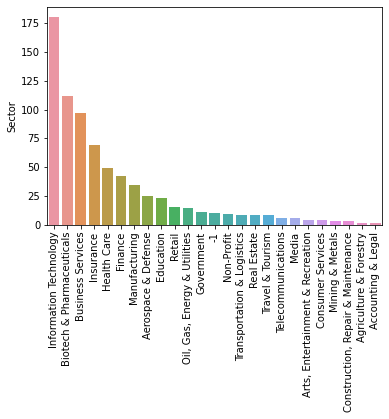

Graph for Revenue: total = 14


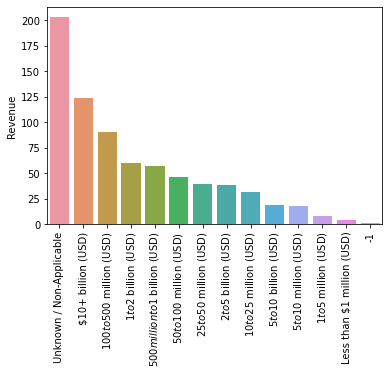

Graph for company_txt: total = 343


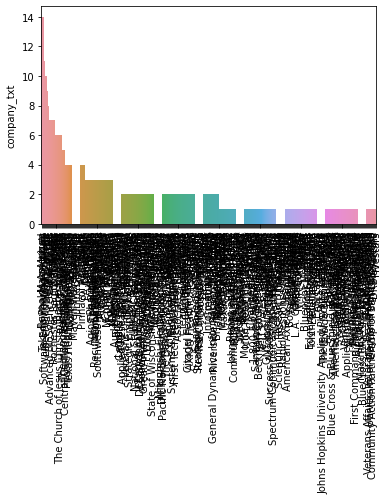

Graph for job_state: total = 37


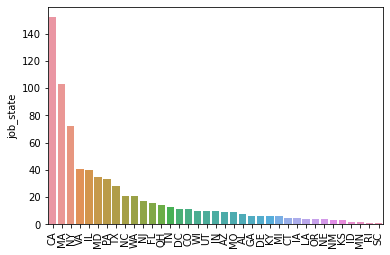

Graph for same_state: total = 2


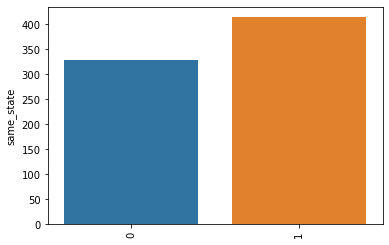

Graph for python: total = 2


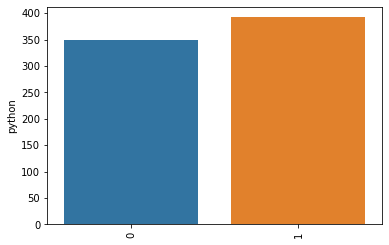

Graph for r_lang: total = 2


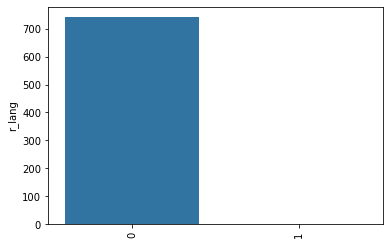

Graph for spark: total = 2


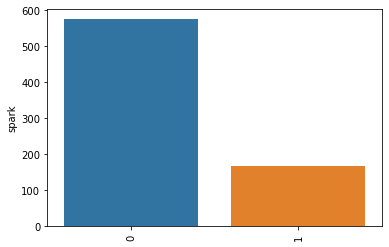

Graph for aws: total = 2


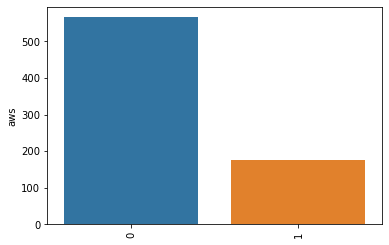

Graph for excel: total = 2


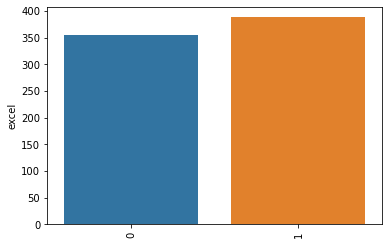

Graph for seniority: total = 3


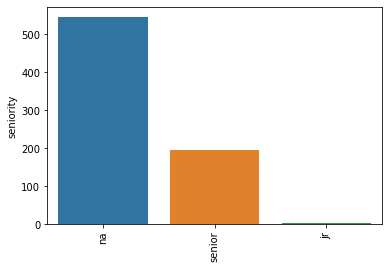

In [17]:
for i in data_cat.columns:
    c = data_cat[i].value_counts()
    print('Graph for %s: total = %d' % (i,len(c)))
    chart = sns.barplot(x = c.index , y = c,)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total = 20


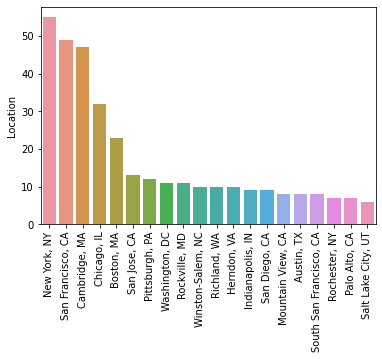

Graph for Headquarters: total = 20


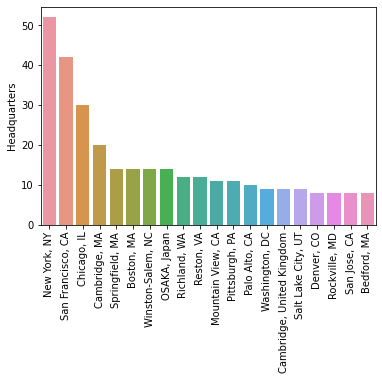

Graph for company_txt: total = 20


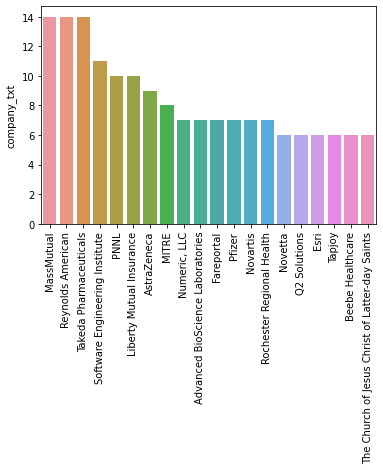

In [18]:
 for i in data_cat[['Location','Headquarters','company_txt']].columns:
    c = data_cat[i].value_counts()[:20]
    print('Graph for %s: total = %d' % (i,len(c)))
    chart = sns.barplot(x = c.index , y = c,)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [19]:
pd.pivot_table(data,index='job_simplfier',values='average_salary')

,average_salary
job_simplfier,
analyst,65.857843
data scientist,113.928392
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [20]:
pd.pivot_table(data,index=['job_simplfier','seniority'],values='average_salary')

average_salary
job_simplfier  seniority                
analyst        jr              56.500000
               na              61.155405
               senior          79.092593
data scientist jr             106.500000
               na             106.648746
               senior         131.203390
director       na             168.607143
manager        na              84.022727
mle            na             126.218750
               senior         127.000000
na             na              76.885714
               senior         110.204545

In [25]:
pd.pivot_table(data, index=['job_state', 'job_simplfier'],
               values='average_salary',aggfunc='count').sort_values('job_state', ascending=False)

average_salary
job_state job_simplfier                 
WI        na                           4
          data scientist               3
          analyst                      3
WA        na                           1
          data scientist              17
          analyst                      3
VA        mle                          2
          data scientist              28
          analyst                      6
          na                           5
UT        data scientist               6
          analyst                      4
TX        na                           7
          data scientist              21
TN        data scientist              11
          analyst                      2
SC        na                           1
RI        analyst                      1
PA        manager                      3
          data scientist               7
          analyst                      8
          mle                          7
          na                           8
OR        data scientist               4
OH        na                           3
          data scientist               7
          analyst                      4
NY        na                          12
          mle                          2
          data scientist              44
          analyst                     14
NM        data scientist               3
NJ        director                     2
          analyst                      6
          data scientist               6
          manager                      2
          na                           1
NE        na                           4
NC        na                          12
          data scientist               9
MO        na                           3
          manager                      1
          data scientist               3
          analyst                      2
MN        data scientist               1
          analyst                      1
MI        manager                      2
          data scientist               4
MD        na                          16
          data scientist              16
          analyst                      3
MA        na                          46
          manager                      5
          director                     6
          data scientist              42
          analyst                      4
LA        analyst                      1
          data scientist               2
          na                           1
KY        na                           4
          data scientist               2
KS        mle                          3
IN        na                           4
          data scientist               6
IL        analyst                      3
          na                           6
          mle                          2
          director                     6
          data scientist              23
ID        analyst                      2
IA        analyst                      2
          data scientist               3
GA        na                           3
          data scientist               3
FL        data scientist              10
          analyst                      6
DE        na                           6
DC        data scientist               9
          analyst                      2
CT        data scientist               2
          na                           3
CO        analyst                      1
          data scientist               6
          mle                          1
          na                           3
CA        na                          27
          mle                          5
          manager                      9
          data scientist              93
          analyst                     18
AZ        data scientist               6
          analyst                      1
          na                           2
AL        na                           2
          data scientist               1
          analyst                      5

In [30]:
pd.pivot_table(data[data.job_simplfier == 'data scientist'], index='job_state',
               values='average_salary').sort_values('average_salary', ascending=False)

,average_salary
job_state,
CA,139.032258
MO,127.666667
DC,120.555556
UT,120.416667
WI,113.500000
NY,112.625000
MA,111.904762
PA,110.214286
IL,109.891304


In [37]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of onwership
data_pivots = data[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'emp_provided',
                'python', 'r_lang', 'spark', 'aws', 'excel', 'Type of ownership', 'average_salary']]

for i in data_pivots.columns:
    print(i)
    print(pd.pivot_table(data_pivots, index=i, values='average_salary').sort_values(
        'average_salary', ascending=False))

Rating
        average_salary
Rating                
-1.0        136.181818
 5.0        134.700000
 2.5        120.000000
 4.5        117.714286
 4.1        116.368421
 3.9        113.071429
 2.6        109.083333
 4.4        108.606061
 3.2        105.500000
 4.0        105.340426
 3.5        104.897959
 3.7        104.131148
 4.7        103.983871
 4.3        102.468750
 3.3        101.858974
 4.2        100.442308
 2.2         97.750000
 4.6         97.250000
 3.8         96.811475
 2.1         95.900000
 3.4         93.011364
 1.9         87.500000
 3.1         86.580000
 3.0         85.588235
 3.6         85.467391
 2.8         83.928571
 2.7         83.250000
 2.3         81.500000
 2.9         81.138889
 4.8         80.277778
 2.4         60.214286
Industry
                                          average_salary
Industry                                                
Other Retail Stores                           163.500000
Motion Picture Production & Distribution      146.0000

ValueError: Grouper for 'average_salary' not 1-dimensional

In [38]:
pd.pivot_table(data_pivots,  index='Revenue', columns='python',
               values='average_salary', aggfunc='count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


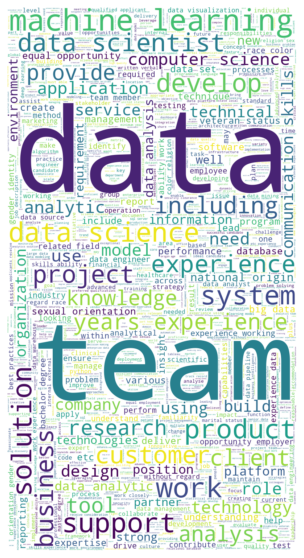

In [48]:
words = " ".join(data['Job Description'])


def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1,
               stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10, 10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()